## Лабораторна робота № 8 Структура даних граф. Алгоритми на графах.
## Мета: засвоїти представлення структури даних граф та основні алгоритми роботи з ними засобами Python.
### Виконав: Яцентюк Євгеній, група: КІ-24-1 

**[GitHub](https://github.com/kefir4ikk)**

## 1. Імпорт

In [40]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt 

## 2. Створення та візуалізація графа

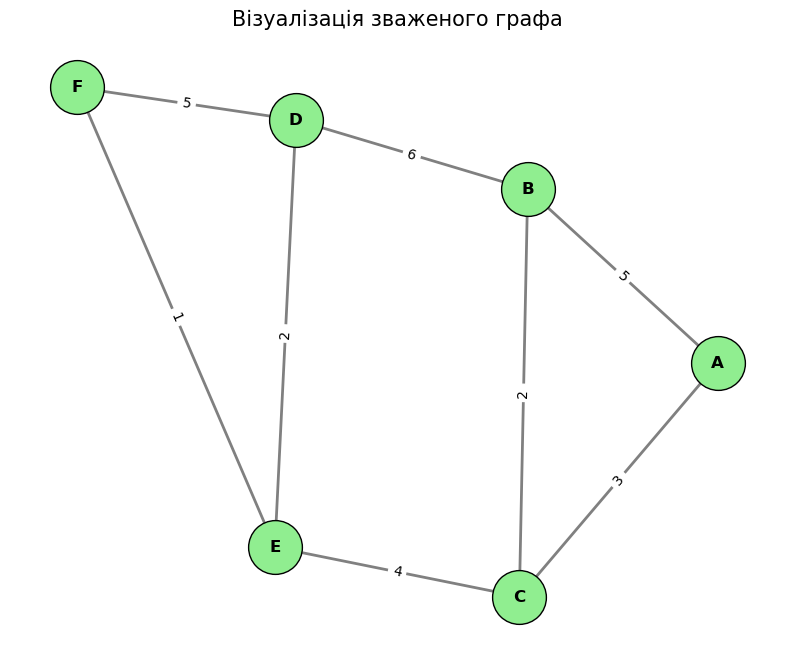

In [55]:
edges = [
    ('A', 'B', 5), 
    ('A', 'C', 3),
    ('B', 'C', 2),
    ('B', 'D', 6),
    ('C', 'E', 4),
    ('D', 'E', 2),
    ('D', 'F', 5),
    ('E', 'F', 1)
]

G = nx.Graph()
G.add_weighted_edges_from(edges)

plt.figure(figsize=(10, 8)) # Робимо графік більшим та чіткішим
pos = nx.spring_layout(G, seed=42) # seed=42 гарантує, що граф не буде "стрибати" при кожному запуску

nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightgreen', edgecolors='black')
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Візуалізація зваженого графа", fontsize=15)
plt.axis('off')
plt.show()

## 3. Алгоритм Дейкстри


Алгоритм Дейкстри
Найкоротший шлях від A до F: ['A', 'C', 'E', 'F']
Довжина шляху: 8


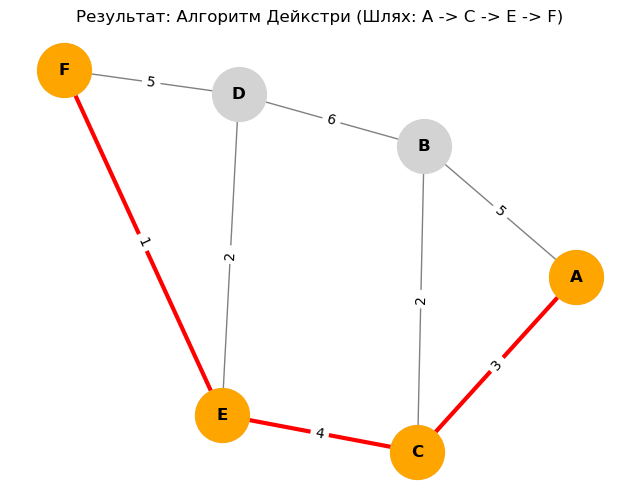

In [44]:
start_node = 'A'
end_node = 'F'

def draw_shortest_path(graph, path, algorithm_name):
    pos = nx.spring_layout(graph, seed=42)
    plt.figure(figsize=(8, 6))
    
    nx.draw_networkx(graph, pos, with_labels=True, node_color='lightgray', 
                     node_size=1500, font_weight='bold', edge_color='gray')
    
    path_edges = list(zip(path, path[1:]))
    
    nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='orange', node_size=1500)
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=3)
    
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    
    plt.title(f"Результат: {algorithm_name} (Шлях: {' -> '.join(path)})")
    plt.axis('off')
    plt.show()

try:
    dijkstra_path = nx.dijkstra_path(G, source=start_node, target=end_node, weight='weight')
    dijkstra_length = nx.dijkstra_path_length(G, source=start_node, target=end_node, weight='weight')
    
    print(f"\nАлгоритм Дейкстри")
    print(f"Найкоротший шлях від {start_node} до {end_node}: {dijkstra_path}")
    print(f"Довжина шляху: {dijkstra_length}")
    
    draw_shortest_path(G, dijkstra_path, "Алгоритм Дейкстри")

except nx.NetworkXNoPath:
    print(f"Шляху між {start_node} та {end_node} не існує.")

## 4: Алгоритм Беллмана-Форда


Алгоритм Беллмана-Форда
Найкоротший шлях від A до F: ['A', 'C', 'E', 'F']
Довжина шляху: 8


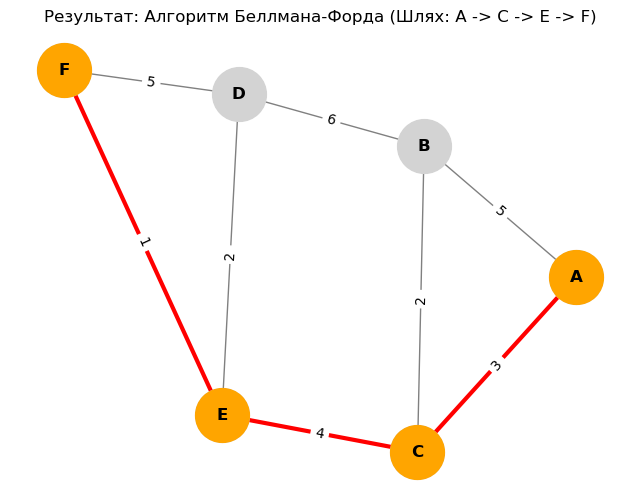

In [45]:
start_node = 'A'
end_node = 'F'

def draw_shortest_path(graph, path, algorithm_name):
    pos = nx.spring_layout(graph, seed=42)
    plt.figure(figsize=(8, 6))
    
    nx.draw_networkx(graph, pos, with_labels=True, node_color='lightgray', 
                     node_size=1500, font_weight='bold', edge_color='gray')
    
    path_edges = list(zip(path, path[1:]))
    
    nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='orange', node_size=1500)
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=3)
    
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    
    plt.title(f"Результат: {algorithm_name} (Шлях: {' -> '.join(path)})")
    plt.axis('off')
    plt.show()

try:
    bf_path = nx.bellman_ford_path(G, source=start_node, target=end_node, weight='weight')
    bf_length = nx.bellman_ford_path_length(G, source=start_node, target=end_node, weight='weight')

    print(f"\nАлгоритм Беллмана-Форда")
    print(f"Найкоротший шлях від {start_node} до {end_node}: {bf_path}")
    print(f"Довжина шляху: {bf_length}")
    
    draw_shortest_path(G, bf_path, "Алгоритм Беллмана-Форда")

except nx.NetworkXNoPath:
    print("Шлях не знайдено.")

## 5: DFS - пошук у глубину


Пошук у глибину (DFS)
Порядок обходу вершин (DFS) починаючи з 'A': ['A', 'B', 'C', 'E', 'D', 'F']


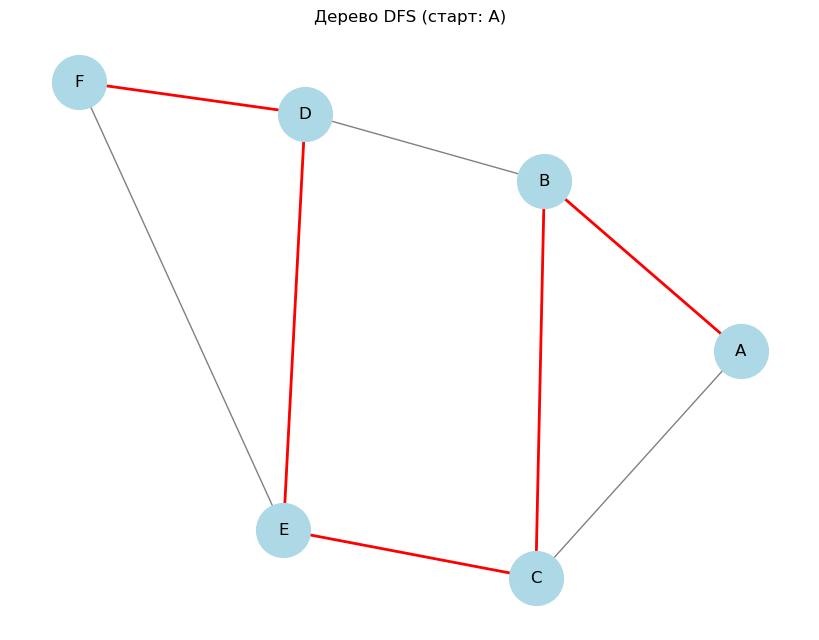

In [47]:
print(f"\nПошук у глибину (DFS)")
dfs_tree = list(nx.dfs_preorder_nodes(G, source=start_node))
print(f"Порядок обходу вершин (DFS) починаючи з '{start_node}': {dfs_tree}")

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, edge_color='gray')
dfs_edges = list(nx.dfs_edges(G, source=start_node))
nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color='red', width=2, arrows=True)

plt.title(f"Дерево DFS (старт: {start_node})")
plt.show()

## 6: BFS - Пошук у ширину


Пошук у ширину (BFS)
Порядок обходу вершин (BFS) починаючи з 'A': ['A', 'B', 'C', 'D', 'E', 'F']
Можливі шляхи від A до F (через BFS):
 -> ['A', 'B', 'D', 'F']
 -> ['A', 'C', 'E', 'F']
 -> ['A', 'B', 'C', 'E', 'F']
 -> ['A', 'B', 'D', 'E', 'F']
 -> ['A', 'C', 'B', 'D', 'F']
 -> ['A', 'C', 'E', 'D', 'F']
 -> ['A', 'B', 'C', 'E', 'D', 'F']
 -> ['A', 'C', 'B', 'D', 'E', 'F']


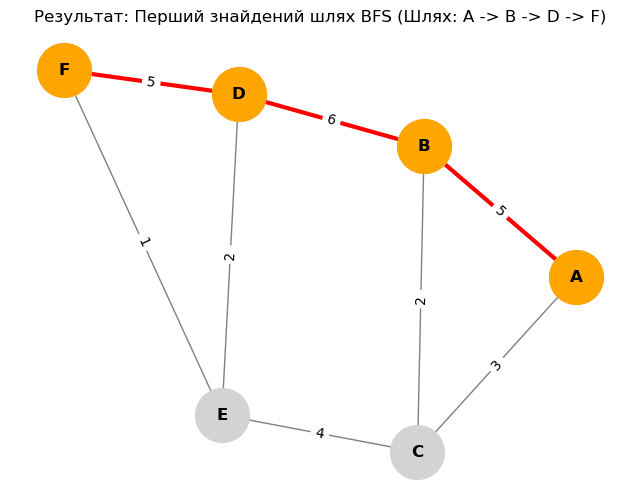

In [31]:
print(f"\nПошук у ширину (BFS)")
bfs_tree = list(nx.bfs_tree(G, source=start_node))
print(f"Порядок обходу вершин (BFS) починаючи з '{start_node}': {bfs_tree}")

def get_all_bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next_node in set(graph.neighbors(vertex)) - set(path):
            if next_node == goal:
                yield path + [next_node]
            else:
                queue.append((next_node, path + [next_node]))

print(f"Можливі шляхи від {start_node} до {end_node} (через BFS):")
bfs_paths = list(get_all_bfs_paths(G, start_node, end_node))
for p in bfs_paths:
    print(f" -> {p}")

shortest_bfs = bfs_paths[0] if bfs_paths else []
if shortest_bfs:
    draw_shortest_path(G, shortest_bfs, "Перший знайдений шлях BFS")

## Контрольні питання

### 1. Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.

**Граф** — це математична структура, що складається з множини вершин (V) та множини ребер (E), які з’єднують пари вершин.
Формально граф задається як G = (V, E).

**Приклади застосування:**
- дорожні мережі (міста — вершини, дороги — ребра);
- комп’ютерні мережі (маршрутизатори та канали зв’язку);
- моделі соціальних зв’язків (користувачі та їх відносини);
- навігаційні задачі та маршрутизація;
- рекомендаційні системи (користувач — товар);
- структура вебсайтів (сторінки і гіперпосилання).

### 2. Які основні види графів існують? Відмінності між орієнтованими і неорієнтованими графами.

**Основні види графів:**
- орієнтовані (диграфи);
- неорієнтовані;
- зважені та незважені;
- прості та мультіграфи;
- циклічні та ациклічні (DAG);
- повні та розріджені.

**Різниця між орієнтованими і неорієнтованими:**
- У орієнтованому графі ребра мають напрям, тобто `(u → v)` не означає `(v → u)`.
- У неорієнтованому графі ребро двонаправлене, тому `(u, v)` означає зв’язок в обидві сторони.

### 3. Як можна представити граф у пам’яті комп’ютера? Опишіть структури даних, які використовуються для зберігання графів.
Найпоширеніші способи:

**1. Матриця суміжності**

Квадратна таблиця n×n, де:
- 1 або вага означає наявність ребра,
- 0 — його відсутність.
Переваги: швидка перевірка наявності ребра.
Недоліки: займає багато пам’яті (O(n²)).

**2. Список суміжності**
Для кожної вершини зберігається список її сусідів.
Найпопулярніше представлення через словник.

Переваги: економія пам’яті на розріджених графах.
Недолік: повільніша перевірка наявності конкретного ребра.

**3. Список ребер**
Зберігається перелік ребер у вигляді кортежів `(u, v, вага)`.

Зручно для алгоритмів на ребрах, наприклад Беллмана–Форда.

### 4. Як працює алгоритм пошуку в ширину (BFS)? Приклади застосування.

**BFS** — це обхід графа, при якому вершини відвідуються "за рівнями".
Алгоритм використовує чергу (FIFO).

Основна ідея:
1. Починаємо зі стартової вершини.
2. Додаємо всіх сусідів у чергу.
3. Потім обробляємо їх сусідів.
4. Продовжуємо доти, доки черга не порожня.

**Де застосовується:**
- пошук найкоротшого шляху в незваженому графі;
- пошук шляхів у лабіринтах;
- визначення компонент зв’язності;
- алгоритми поширення сигналу/повідомлень;
- “дистанція” в соцмережах (лінія друзів).

### 5. Що таке DFS? Чим він відрізняється від BFS? Де використовується.

**DFS** — це обхід графа в глибину.
Ідея алгоритму: рухатися по ребрах максимально далеко, доки можливо, а потім “відкотитися” назад. Реалізується або рекурсією, або стеком.

**Відмінності з BFS:**
- BFS іде по рівнях (ширина), DFS — по одному шляху до кінця (глибина).
- BFS підходить для найкоротших шляхів у незважених графах.
- DFS добре підходить для структурного аналізу графа.

**Де використовується DFS:**
- виявлення циклів у графах;
- топологічне сортування (DAG);
- пошук компонент зв’язності;
- перевірка двочастковості графа;
- генерація лабіринтів.

### 6. Алгоритм Дейкстри. Умови роботи.

Алгоритм Дейкстри знаходить найкоротші шляхи від заданої вершини до всіх інших у зваженому графі.

Ідея:

1. У кожної вершини є поточна «найкраща» відстань.
2. Спочатку вона нескінченність, окрім стартової (0).
3. На кожному кроці вибираємо вершину з найменшою відстанню.
4. Оновлюємо відстані до її сусідів, якщо знайшли коротший шлях.
5. Повторюємо, доки всі вершини не будуть опрацьовані.

Умови коректної роботи:
- Всі ваги ребер повинні бути невід’ємними.
- Якщо є негативні ваги — Дейкстра дає неправильний результат.